<a href="https://colab.research.google.com/github/nahuelalmeira/poblacionPenal/blob/master/DiploDatos_PoblacionPenitenciariaArgentina_VyA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DiploDatos 2019 -  Población Penitenciaria en Argentina




> http://diplodatos.famaf.unc.edu.ar/poblacion-penitenciaria-en-argentina-2002-a-2017/




## Practico Análisis y Visualización de Datos

En este notebook se explicarán los métodos para la carga inicial de los datos que vamos a usar en el proyecto, se describirá la estructura general de los mismos, y veremos algunos métodos básicos de análisis.

Antes de comenzar a trabajar con CSVs, siempre es recomendable descargar el dataset en nuestra computadora y observarlo directamente con alguna herramienta de procesamiento de texto , para tener una visión rápida del tipo de datos con el cual trabajeremos, pero también para asegurarnos que estamos utilizando un archivo con el formato correcto.

### Inicialización y carga de datos

In [0]:
# Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_columns', 100)


In [2]:
# Cargamos el CSV en un dataframe
url = 'https://github.com/camporeale/Datos/raw/master/sneep_2017_diplodatos.zip'
data_raw = pd.read_csv(url,compression='zip',index_col=0)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Análisis exploratorio

In [0]:
# Obtenemos la cantidad de filas y columnas
print("Cantidad de registros: ", data_raw.shape[0])
print("Cantidad de columnas: ", data_raw.shape[1])

Cantidad de registros:  85283
Cantidad de columnas:  50


In [0]:
# Listamos las columnas y sus tipos de datos
data_raw.dtypes

anio_censo                                              int64
provincia_descripcion                                  object
establecimiento_descripcion                            object
edad                                                  float64
genero_descripcion                                     object
nacionalidad_descripcion                               object
estado_civil_descripcion                               object
nivel_instruccion_descripcion                          object
ultima_situacion_laboral_descripcion                   object
capacitacion_laboral_al_ingresar_descripcion           object
ultimo_lugar_residencia_descripcion                    object
ultima_provincia_residencia_descripcion                object
jurisdiccion_descripcion                               object
situacion_legal_descripcion                            object
fecha_detencion                                        object
fecha_condenado                                        object
establec

In [0]:
# Analizamos 2 muestras de filas, usamos transpose() para visualizar los datos con mayor comodidad
data_raw.sample(2).transpose()

,44841,43189
anio_censo,2017,2017
provincia_descripcion,Córdoba,Buenos Aires
establecimiento_descripcion,ESTABLECIMIENTO PENITENCIARIO Nº 5 (VILLA MARIA),SPF - COMPLEJO FED. DE JÓVENES ADULTOS - UR.1 ...
edad,32,19
genero_descripcion,Masculino,Masculino
nacionalidad_descripcion,Argentina,Argentina
estado_civil_descripcion,Soltero,Soltero
nivel_instruccion_descripcion,Terciario incompleto,Primario incompleto
ultima_situacion_laboral_descripcion,Trabajador de tiempo parcial,Desocupado
capacitacion_laboral_al_ingresar_descripcion,Tiene alguna profesión,No tiene ni oficio ni profesión


In [0]:
# Distribución por genero

data_raw["genero_descripcion"].value_counts()

Masculino     81553
Femenino       3602
Transexual      128
Name: genero_descripcion, dtype: int64

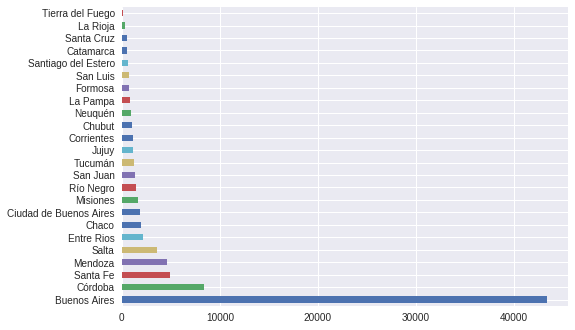

In [0]:
# Internos por provincia
data_raw["provincia_descripcion"].value_counts().plot(kind='barh')

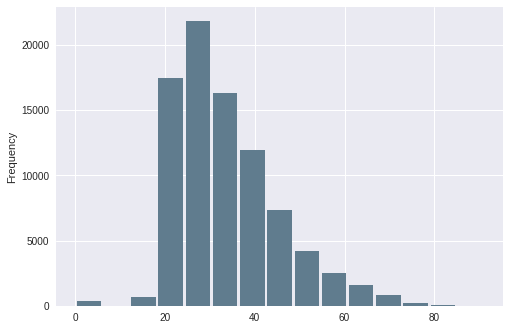

In [0]:
# Histograma por edades
data_raw["edad"].plot.hist(grid=True, bins=15, rwidth=0.9,color='#607c8e')

### Análisis del Grupo

En esta sección el grupo de trabajo deberá realizar el siguiente análisis:



*   Análisis estadístico de variables


> Seleccionar un conjunto de al menos 4 variables que resulten de interés para el grupo y:
1.   Usar distintos tipos de gráficos para describir sus distribuciones
2.   Analizar Outliers
3.   Calcular estadísticos clásicos (media, mediana, moda, desviación estandar)



*   Evolución de variables en el tiempo. Seleccionar 2 variables y graficar como fueron cambiando desde 2002 a 2017.  Para ello se tiene que utilizar el siguiente conjunto de datos:

https://github.com/camporeale/Datos/raw/master/sneep_2002_2017_diplodatos.zip




*   Analisis de probabilidades condicionales. Tomar al menos dos pares de variables y realizar un análisis del tipo:



> ¿Cual es la probabilidad de que el interno haya sido lesionado en el último año dado que está en una  prisión en Buenos Aires? ¿Y en Córdoba? 

> ¿Cual es la probabilidad de que se le otorguen salidas provisorias dado que esté casado/a? ¿Y siendo soltero?



Los siguientes recursos pueden usarse como ejemplos de distintos tipos de análisis:

*   http://www.saij.gob.ar/estadisticas-ejecucion-de-la-pena
*   http://www.jus.gob.ar/media/1126013/Una_Gestion_Penitenciaria_Integral_SNEEP.pdf


